# **Capstone project: Providing data-driven suggestions for HR**

## Scenario

You are a data professional working for Salifort Motors.

Currently, there is a high rate of turnover among Salifort employees (In this context, turnover data includes both employees who choose to quit their job and let go). Salifort’s senior leadership team is concerned about how many employees are leaving the company. Salifort strives to create a corporate culture that supports employee success and professional development. Further, the high turnover rate is costly in the financial sense. Salifort makes a big investment in recruiting, training, and upskilling its employees. 

If Salifort could predict whether an employee will leave the company, and discover the reasons behind their departure, they could better understand the problem and develop a solution. 

As a first step, the leadership team asks Human Resources to survey a sample of employees to learn more about what might be driving turnover.  

Next, the leadership team asks you to analyze the survey data and come up with ideas for how to increase employee retention. To help with this, they suggest you design a model that predicts whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant data points. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees. 

As a specialist in data analysis, the leadership team leaves it up to you to choose an approach for building the most effective model to predict employee departure. For example, you could build and evaluate a statistical model such as logistic regression. Or, you could build and evaluate machine learning models such as decision tree, random forest, and XGBoost. Or, you could choose to deploy both statistical and machine learning models. 

For any approach, you’ll need to analyze the key factors driving employee turnover, build an effective model, and share recommendations for next steps with the leadership team. 


# **PACE stages**


## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in DataFrame
pd.set_option('display.max_columns', None)

# For statistical analysis
from scipy import stats

### Load dataset

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)

(eg. What is the condition of the provided dataset?<br>
 &emsp;&emsp;What variables will be the most useful?<br>
&emsp;&emsp;What steps can I take to reduce the impact of bias?)

### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe(include='all')


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


**Note:** Some things stand out from this table of summary statistics. For instance, there are clearly some outliers in `tenure` (10yrs). Also, if a numerical variable seem to be almost constant throughout the data, it usually would not be expected to be very informative.

### Rename columns

Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
set(df0.columns)


{'Department',
 'Work_accident',
 'average_montly_hours',
 'last_evaluation',
 'left',
 'number_project',
 'promotion_last_5years',
 'salary',
 'satisfaction_level',
 'time_spend_company'}

In [6]:
# Rename columns as needed
df0.columns = df0.columns.str.lower()
df0.rename(columns={'satisfaction_level': 'satisfaction_score',
                    'last_evaluation': 'last_eval_score',
                    'number_project': 'no_project',
                    'average_montly_hours': 'avg_monthly_hrs',
                    'time_spend_company': 'tenure',
                    'department': 'dept'},
          inplace=True)

# Display all column names after the update
df0.columns

Index(['satisfaction_score', 'last_eval_score', 'no_project',
       'avg_monthly_hrs', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

### Check missing values

In [7]:
# Check for any missing values in the data
df0.isnull().sum()


satisfaction_score       0
last_eval_score          0
no_project               0
avg_monthly_hrs          0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

### Check duplicates

In [8]:
# Check for duplicates entries in the data
df0.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(15)


,satisfaction_score,last_eval_score,no_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,dept,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


To verify whether there's two employees self-reported the exact response, a likelihood analysis could be perform by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column. But, this doesn't seem necessary. With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate and can proceed by dropping them.  


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
empl_data = df0.drop_duplicates(keep='first', ignore_index=True)

# Display first few rows of new dataframe as needed
empl_data.head()


,satisfaction_score,last_eval_score,no_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
empl_data.describe(include='all')

,satisfaction_score,last_eval_score,no_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,dept,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991,11991
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3239,5740
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,NaN,NaN
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


For the initial cleaning of redundant data, subset of values / variables may be dropped if 
- insignificant / non-correlated to the target
- does not change the data story when eliminated
- unimportant based on domain knowledge on the subject or, highly correlated to other predictors<br>
  (since they provide almost similar amount of information)

Note: If unsure, it should be kept and evaluated by feature selection algorithm.  

### Check for outliers in the data

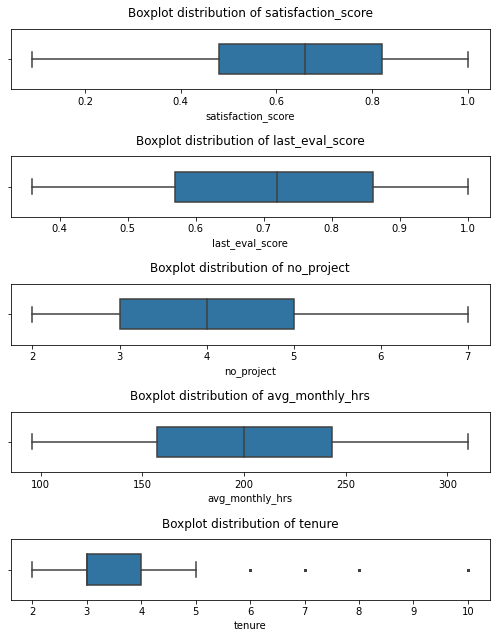

In [12]:
# Create boxplots to visualize the distributions and detect any outliers
numeric_cols = list(empl_data._get_numeric_data().columns)[:5]

fig, ax = plt.subplots(figsize=(7,9), nrows=5)
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=empl_data[col], fliersize=1.5, ax=ax[i], width=0.5)
    ax[i].set_title(f'Boxplot distribution of {col}', y=1.1)
fig.tight_layout()

# Note: We might first get the vars potentially with outliers from the max & min 
#       in descriptive statistics (Q1/Q3+-1.5*IQR) instead of plotting all out.

In [13]:
# Determine the number of rows containing outliers
empl_data.loc[df0.tenure > 5,:].shape[0]


817

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA

( Explore variables that are correlated and their relationships to the variable of interest, &/ followed by progressive feature selection to give more precision about target. )


There's usually a lot of work involved in feature selection, such as:
- selecting potential predictors as reflective of employee's performance & involvement in the job.
- removing columns due to ethical reasons & has no inherent value to analysis / modeling (eg. name, id, gender, etc). 
- examining multi-collinearity of vars and picking the most suitable ones as variate or covariates (eg. because the overall no. of rebounds should already incorporate both offensive & defensive rebounds, it would make sense to use the overall as a feature).  
- Checking interaction terms for numeric function model<br> (eg. Regression, LinearDiscriminantAnalysis, SVM, and Neural Networks). 

**( In general, statistical inferences: correlation, significance, and predictive power may be used as guidance but choose predictors / interactions based on understanding of the subject matter )**

## Exploratory Data Analysis (EDA)

Lay out the story that's tempted to tell. Then, poke it from several angles with follow-up investigations to see if it holds water. <br>
**(eg. look at the data in 100 different ways / test 100 different hypotheses)** 


Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
print(empl_data.left.value_counts(), '\n')

# Get percentages of people who left vs. stayed
print(empl_data.left.value_counts(normalize=True) * 100)

# As the target variable is not heavily skewed/imbalance, no balancing is needed.  

0    10000
1     1991
Name: left, dtype: int64 

0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Consider what data you have and what you can get, where the data is from, how it was derived, and what all the variables mean, and let that extra information guide your visual exploration.   

- What type of variation {typical & unusual values} occurs within the variables?<br>
    —Look for peaks, valleys, range & the spread of data.<br>—Does that match your expectations? What might explain them?


- What type of covariation {patterns & equation models} occurs btw the variables?<br>
    —Are there trends/relationships implied by the patterns? Could it be coincidence (ie. random chance)?<br>—Does the relationship change if you look at individual sub-groups of the data?<br>—Are equation model needed for extracting patterns out of data? <br>(eg. As cut, carat & price are tightly logarithmic related, it requires fitting a model that predicts price from carat then computes the residuals that give us a view of price once the effect of carat has been removed.)


- What do the distributions & relationships of the variables tell you about the questions or the problem you're trying to solve?
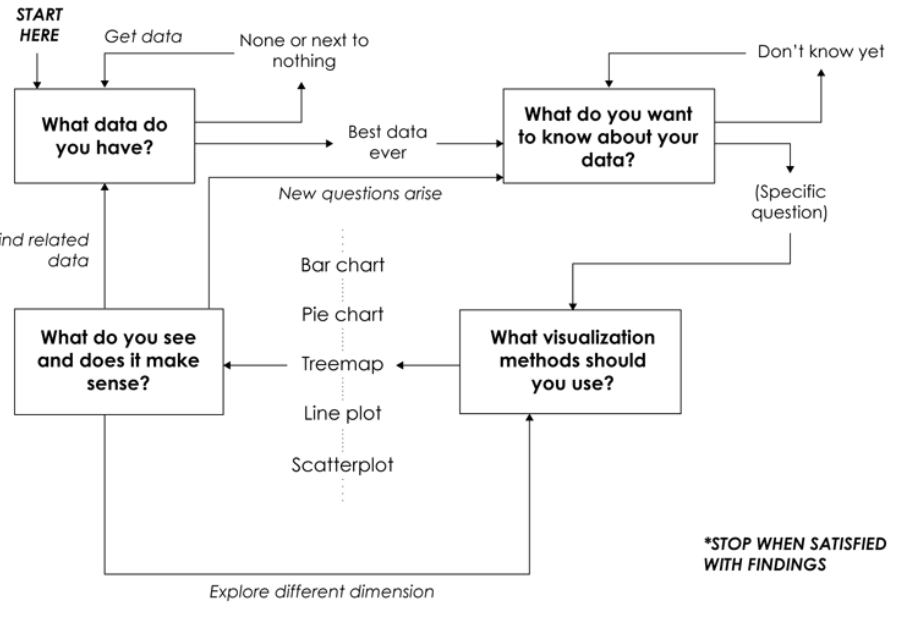

**Note:** Separate exploratory from explanatory analysis, where concise visuals for communication would be shown instead of the robustness of analysis. 

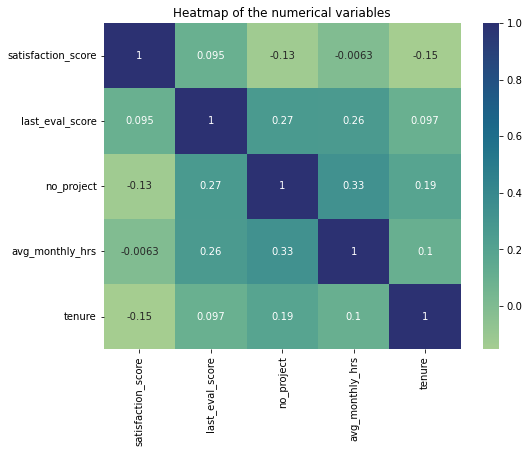

In [15]:
# Create a heatmap to examine correlations btw the numerical vars 
plt.figure(figsize=(8, 6))
sns.heatmap(empl_data[['satisfaction_score', 'last_eval_score', 'no_project', 'avg_monthly_hrs', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the numerical variables')
plt.show()

## The correlation heatmap confirms that the number of projects, 
## monthly hours, and evaluation scores all have some positive correlation
## with each other, and whether an employee leaves is negatively correlated
## with their satisfaction level.

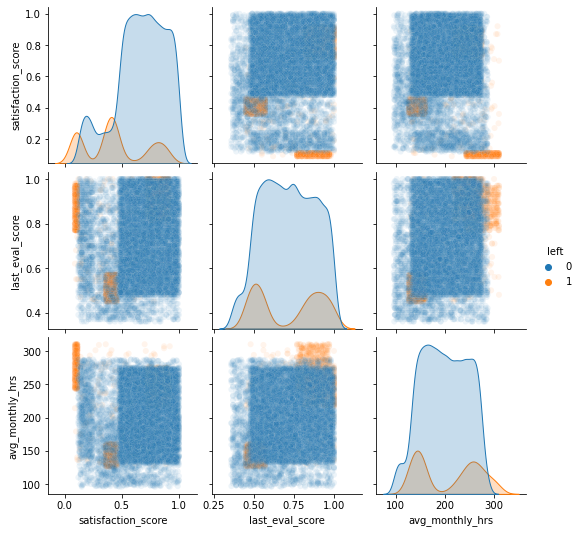

In [15]:
scatter_mat = sns.pairplot(data=empl_data, vars=['satisfaction_score', 'last_eval_score', 'avg_monthly_hrs'], hue='left', plot_kws={'alpha': 0.08})

# The scatterplots show there were sizeable groups of employees and they seemed to have correlation btw each other. 

# Besides, a few things stand out from the marginal distributions.
# 1. The employees who left were divided in 3 separate satisfaction groups, 
#    which may be explained as: (A) aggrieved, (B) hesitant, and (C) assorting to better opportunity. 
# (as suggested by the inflection pts- the change in behavior of the groups & the overlapping on the minor group of employees who stayed) 
#    - Of those in group A, it's possible that this group includes employees that were fired
#      instead of those who were voluntarily turnover due to negative workplace culture only.
#    - Often the first 2 groups (A & B) could be mitigated with effective treatment in a short period of time, 
#      but the 3rd group could potentially be a global phenomenon that may require a long & sustained effort. 

# 2. The majority of the last evaluation scores from the employees who stayed were between 0.5 & 0.9. 
#    It's unsurprising that there were two distinguishing groups in the leavers which reasonably inferred to
#    those reluctant to engage as they were already on their way out as well as those that were still motivated
#    and inclined to achieve more with greater opportunity. 

# 3. A disproportionate amount of average working hours were shown experienced by the leavers compared to 
#   the average productive hours of the employees who stayed. 

In [16]:
empl_data[(empl_data.satisfaction_score < 0.5) & (empl_data.left == 1)]

## To inspect the no. of employees left with unmet expectations and overall dissatisfaction.

,satisfaction_score,last_eval_score,no_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
1985,0.43,0.54,2,156,3,0,1,0,sales,low
1986,0.37,0.57,2,147,3,0,1,0,sales,low
1987,0.11,0.92,7,293,4,0,1,0,sales,low
1988,0.41,0.53,2,157,3,0,1,0,sales,low


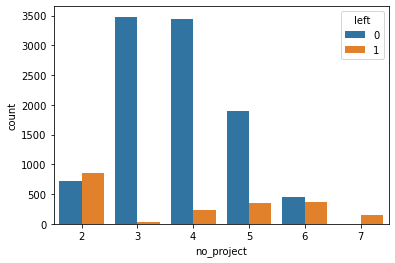

In [17]:
project_p = sns.countplot(data=empl_data, x='no_project', hue='left')
project_p.legend(loc='upper right', title='left')
plt.show()

# A similar result is revealed by the no. of project where
# the disproportionate amount of projects had driven an unproductive work culture. 

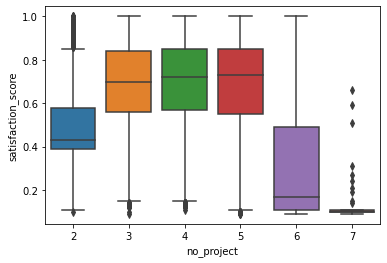

In [18]:
sns.boxplot(data=empl_data, x='no_project', y='satisfaction_score')

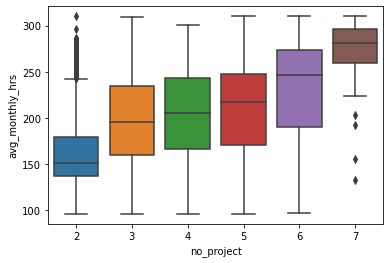

In [19]:
sns.boxplot(data=empl_data, x='no_project', y='avg_monthly_hrs')

# It is undestandably that a larger workload is associated with a longer working hour, and 
# the optimal no. of projects for employees to work productively seem to falls in the range of 3-5
# with a marginal difference in the means of average monthly hours & satisfactory score. 

# Besides, referring to the French labour code, the maximum monthly 
# working hours in France is `151.67 hours per month`. This means that,
# most the employees here are overworked, aside from the employees who worked on two projects.

In [20]:
aov_res = stats.f_oneway(empl_data[empl_data.no_project == 3].avg_monthly_hrs,
                         empl_data[empl_data.no_project == 4].avg_monthly_hrs,
                         empl_data[empl_data.no_project == 5].avg_monthly_hrs)
print(f'p-value: {aov_res.pvalue / 2:.4G}')

# As p-value < 0.05, there is sufficient evidence to infer that the 
# linear increament in the average monthly hours w.r.t. the no. of projects is real. 

p-value: 3.468E-22


For the next visualization, it might be interesting to visualize the effect of tenure.

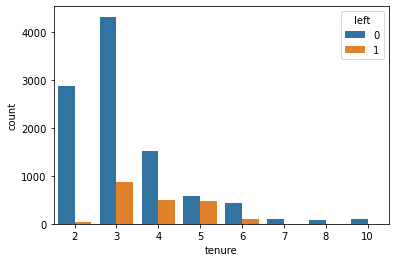

In [21]:
tenure_p = sns.countplot(data=empl_data, x='tenure', hue='left')
tenure_p.legend(loc='upper right', title='left')
plt.show()

# The distribution of tenure is right skewed, with most employees having 2- 4 years experience in the organization.
# Separating the tenure by employment status reveals that the employees inclined to leave starting at the 3rd year 
# and only a minor portion is remained for an extensive period of more than 5years. 

In [22]:
by_tenure = empl_data.pivot_table(values='left', index='tenure', margins=True, 
                                columns='salary', aggfunc= 'count', fill_value=0)
by_tenure['% Low tier'] = by_tenure['low'] / by_tenure['All'] * 100
by_tenure

# Disregarding the short tenures, the long-tenured employees were inclined to stay as
# higher proportions of the groups rewarded with satisfactory salary (medium - high) & rank. 

salary,high,low,medium,All,% Low tier
tenure,,,,,
2,258,1374,1278,2910,47.216495
3,419,2519,2252,5190,48.535645
4,150,986,869,2005,49.177057
5,57,550,455,1062,51.789077
6,46,235,261,542,43.357934
7,19,18,57,94,19.148936
8,9,30,42,81,37.037037
10,32,28,47,107,26.168224
All,990,5740,5261,11991,47.869235


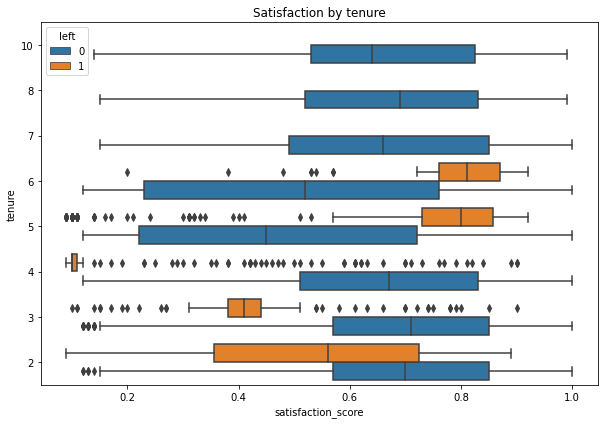

In [23]:
fig, ax = plt.subplots(figsize=(8.5, 6))

sns.boxplot(data=empl_data, x='satisfaction_score', y='tenure',
            hue='left', orient='h', ax=ax)
ax.invert_yaxis()
ax.set_title('Satisfaction by tenure', fontsize=12)

fig.tight_layout()

plt.show()

# There are many observations that could make from this plot.

# - Employees who left fall into two general categories: dissatisfied employees with shorter tenures
#   and very satisfied employees with medium-length tenures.

# - Four-year employees who left seem to have an unusually low satisfaction level. 
#   It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.

Finally, the meaningful relationships in the categorical vars such as `salary`, `department`, `promotion_last_5years`, and `work_accident` would be explored.

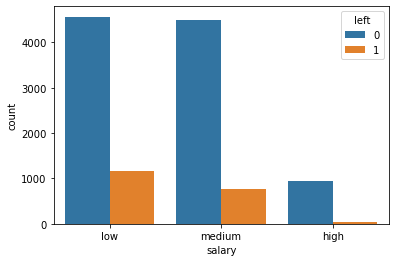

In [24]:
salary_p = sns.countplot(data=empl_data, x='salary', hue='left')
salary_p.legend(loc='upper right', title='left')
plt.show()

In [25]:
print(empl_data.pivot_table('salary', index='promotion_last_5years', columns='left', aggfunc='count'),
      empl_data.pivot_table('salary', index='work_accident', columns='left', aggfunc='count'),
      sep='\n\n')

left                      0     1
promotion_last_5years            
0                      9805  1983
1                       195     8

left              0     1
work_accident            
0              8255  1886
1              1745   105


In [26]:
# Examine the significance of correlations
chi2_promotion = stats.chi2_contingency(empl_data.pivot_table('salary', index='promotion_last_5years', columns='left', aggfunc='count'))
chi2_accident = stats.chi2_contingency(empl_data.pivot_table('salary', index='work_accident', columns='left', aggfunc='count') )
print(f"p-values::  Work_accident: {chi2_accident[1]:.3g}, Promotion_last_5years: {chi2_promotion[1]:.3g} ")

# As the p-values for work_accident & promotion_last_5years < 0.05,
# it's reasonable to infer that both of the job aspects are correlated to the decisions of employees to leave. 

p-values::  Work_accident: 9.91e-43, Promotion_last_5years: 1.63e-06 


In [27]:
dept_records = (empl_data[['dept', 'left']].groupby(by='dept')
               .agg(frequency = pd.NamedAgg(column='left', aggfunc='count')))
dept_records

,frequency
dept,
IT,976
RandD,694
accounting,621
hr,601
management,436
marketing,673
product_mng,686
sales,3239
support,1821


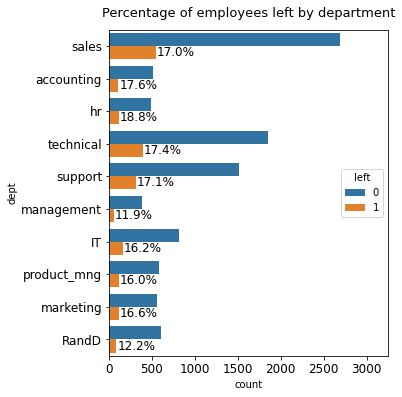

In [28]:
group_idx = ['sales', 'accounting', 'hr', 'technical', 'support',
             'management', 'IT', 'product_mng', 'marketing', 'RandD']
i = -1

plt.figure(figsize=(5, 6))
department_p = sns.countplot(data=empl_data, y='dept', hue='left', orient='h')

for block, group in zip(department_p.patches, group_idx * 2):
    i += 1
    if i in range(0, 10):
        continue
    department_p.annotate(str(round((block.get_width() / dept_records.loc[group, 'frequency'] * 100), 1)) + '%',
                          (block.get_width() + 150, block.get_y()), fontsize='large',
                          va='top', ha='left', xytext=(-12, 0), textcoords='offset points')

department_p.legend(loc='center right', title='left')
department_p.set_xlim(0, 3250)
department_p.tick_params(labelsize=12)
department_p.set_title('Percentage of employees left by department', y=1.02, fontsize=13)
plt.show()

# Although the department of sales, technical and support have the most no. of turnover, 
# the rate varies very little by department except for management & RandD.
# Could it be the employee's salary w.r.t department?  

In [29]:
crosstab = empl_data[['dept', 'left', 'salary']].pivot_table(values='left', index=['dept'], columns=['salary'],
                                                                   aggfunc='count', fill_value=0, margins=True, margins_name='Total')
pct_crosstab = crosstab.copy().loc['IT':'technical', :]
pct_crosstab.iloc[:, :-1] = round(pct_crosstab.iloc[:, :-1].div(crosstab['Total'], axis=0) * 100, 2)
pct_crosstab['Total'] = 100

joined_crosstab = pd.concat([crosstab.copy().loc['IT':'technical', :], pct_crosstab]).sort_index(kind='stable')
joined_crosstab.set_index(pd.MultiIndex.from_product([joined_crosstab.index.unique(), ['count', '%']]))


salary               high      low   medium  Total
dept                                              
IT          count   71.00   476.00   429.00    976
            %        7.27    48.77    43.95    100
RandD       count   47.00   322.00   325.00    694
            %        6.77    46.40    46.83    100
accounting  count   63.00   296.00   262.00    621
            %       10.14    47.67    42.19    100
hr          count   38.00   296.00   267.00    601
            %        6.32    49.25    44.43    100
management  count  128.00   139.00   169.00    436
            %       29.36    31.88    38.76    100
marketing   count   62.00   310.00   301.00    673
            %        9.21    46.06    44.73    100
product_mng count   52.00   343.00   291.00    686
            %        7.58    50.00    42.42    100
sales       count  237.00  1553.00  1449.00   3239
            %        7.32    47.95    44.74    100
support     count  126.00   867.00   828.00   1821
            %        6.92    47.61    45.47    100
technical   count  166.00  1138.00   940.00   2244
            %        7.40    50.71    41.89    100

In [30]:
# Examine the rate of promotion across all departments 
by_dept = empl_data.pivot_table(values='left', index='dept', margins=True,
                                columns='promotion_last_5years', aggfunc= 'count',
                                fill_value=0)
by_dept['Promotion_rate'] = by_dept[1] / by_dept['All'] * 100
by_dept

# As the management department has a highest promotion rate & proportion of higher rank positions, 
# it clearly justifies the fact why the employees there are more inclined to stay compared to others. 

promotion_last_5years,0,1,All,Promotion_rate
dept,,,,
IT,974,2,976,0.204918
RandD,673,21,694,3.025937
accounting,611,10,621,1.610306
hr,590,11,601,1.830283
management,400,36,436,8.256881
marketing,646,27,673,4.011887
product_mng,686,0,686,0.000000
sales,3181,58,3239,1.790676
support,1805,16,1821,0.878638


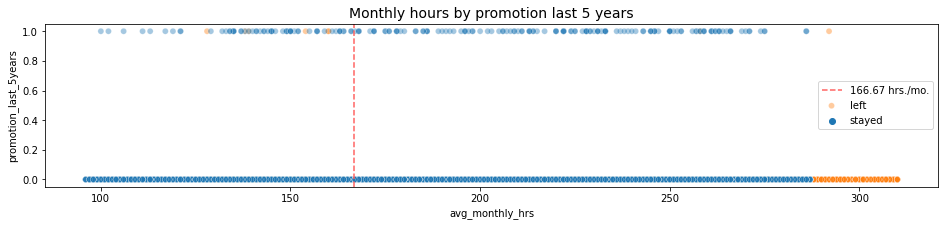

In [31]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=empl_data, x='avg_monthly_hrs', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

# The plot above shows the following:
# - very few employees who were promoted in the last 5years left
# - very few employees who worked the most hours were promoted
# - all of the employees who left were working the longest hours

**Note:** A heatmap / Pearson's correlation table is   

### Insights

[What insights can be gathered from the plots created to visualize the data?]

It appears that the employees who turned over were categorized in 3 sizeable groups, which the majority (>70%) can be accounted to discontentment with generally lower satisfaction levels. This is tied to suboptimal work conditions such as disproprtionate work distribution, longer working hours & inadequate compensation as a result of poor management.  

A significant pattern was also revealed in the data suggesting that the optimal work assignments (no of projects and associated average monthly hours) falls between the range of 3-5 without leaving the employees feeling overwhelm. Otherwise they're most inclined to turnover at the beginning of the 3rd tenure. 

# paCe: Construct Stage

Choosing an appropriate classification algorithm for a particular task requires practice. Each algorithm has its own quirks and is based on certain assumptions; these may differ in the number of features / samples, the amount of noise in a dataset, and whether the classes are linearly separable or not.    

In practice, it's always recommended that the performance of at least a handful of different learning algorithms are compared to determine how well the models fit the data. 


🔎

**For Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

** The Logistic Regr model is set apart to avoid notebook being overly long. 



## Step 3. Model Building, Step 4. Results and Evaluation

The main steps that involved in training a machine learning algorithm can be summarized as:
  1. Selecting feature and gathering relevant sample data. 
  2. Choosing a performance metric.
  3. Choosing a classifier and optimization algorithm.
  4. Evaluating the performance of the model.
  5. Tuning the algorithm.

### Identify the type of data mining task.

- A classification task to predict whether an employee will leave the company (quit & let go) and identify the key factors driving the turnover. 

**What are the ethical implications of the model?** 
* What is the likely effect of the model when it predicts a false negative
* What is the likely effect of the model when it predicts a false positive

- The company will risk losing a potentially valuable employee as well as affecting the revenue of business.<br>
(On the other hand, if a difficult employee is failed to be identified and dealed with, it'll likely to affect the workplace culture as well as the overall productivity of employees at work)


- Conversely, the company will risk allocating needless incentivizing treatment to an employee which in turn increases the operational cost. 



### Feature Engineering

In [32]:
empl_data.head(5)

,satisfaction_score,last_eval_score,no_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
# Convert categorical features to one-hot encoded features
dummy_vars = pd.get_dummies(empl_data.dept, drop_first=False)
empl_data = pd.concat([empl_data.drop(columns=['dept']), dummy_vars], axis=1)
empl_data

,satisfaction_score,last_eval_score,no_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,high,0,0,0,0,1,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,0,1,high,0,0,0,0,1,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,0,1,high,0,0,0,0,1,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,0,1,high,0,0,0,0,0,1,0,0,0,0


In [34]:
# Encode the `salary` column as an ordinal numeric category
empl_data['salary'] = (empl_data['salary']
                       .astype('category')
                       .cat.set_categories(['low', 'medium', 'high'])
                       .cat.codes
                      )

In [35]:
empl_data.dtypes

satisfaction_score       float64
last_eval_score          float64
no_project                 int64
avg_monthly_hrs            int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
salary                      int8
IT                         uint8
RandD                      uint8
accounting                 uint8
hr                         uint8
management                 uint8
marketing                  uint8
product_mng                uint8
sales                      uint8
support                    uint8
technical                  uint8
dtype: object

### Modeling

In [36]:
# For data modeling
from sklearn.ensemble import RandomForestClassifier

# For models development, metrics of evaluation & optimization
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.pipeline import make_pipeline
import sklearn.metrics as metrics

# For saving models
import pickle

In [37]:
# Identify the predictor & outcome vars
predictors = empl_data.drop(columns='left').copy()
outcome = empl_data.left

In [38]:
# Separate into train, validate and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.2, random_state=0)


In [39]:
# Check the no. of class labels in each array
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

# Note: To avoid optimistic bias from an imbalance set ~90:10 where the model could
#      achieve 90% accuracy on the test set by just memorizing & predicting the majority class
#      for all samples, without a clear decision boundary learnt by the algorithm  

Labels counts in y_train: [7976 1616]
Labels counts in y_test: [2024  375]


In [40]:
# 1. Define a dictionary of hyperparameters to tune.
cv_params = dict(max_depth=[None], min_samples_leaf=[1],
                 min_samples_split=[15], max_features=['sqrt'],
                 n_estimators=[800], max_samples=[None])

#Note: Start with default hyperparameters as effective settings are usually pre-defined in the base model.

# 2. Define a set of scoring metrics to be determined by model
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 3. Search for the optimal hyperparameters with GridSearchCV
RF_cv = GridSearchCV(RandomForestClassifier(random_state=24),
                     cv_params,
                     scoring=scoring,
                     cv=10,
                     refit='f1',
                     n_jobs=-1
                    )


Evaluate the performance of model based on the computational cost from training time as well as the predictive power.

In [41]:
%%time
RF_cv.fit(X_train, y_train)

CPU times: user 5.21 s, sys: 392 ms, total: 5.6 s
Wall time: 39.4 s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=24,
                                 

In [40]:
# Retrieve the best combination of hyperparameters
RF_cv.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 800}

In [42]:
# Examine the best accuracy score:
RF_cv.best_score_

0.94895629833714

In [43]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a dataframe with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'accuracy': 'mean_test_accuracy',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'auc': 'mean_test_roc_auc'
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    auc = best_estimator_results.mean_test_roc_auc
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'auc': [auc],
                          'accuracy': [accuracy],
                        },
                       )

    return table

In [44]:
# Retrieve different score metrics from the model for better evaluation
results = make_results("Tuned RandomForest", RF_cv, 'f1')
results

,model,precision,recall,F1,accuracy
0,Tuned RandomForest,0.988659,0.912714,0.948956,0.983528


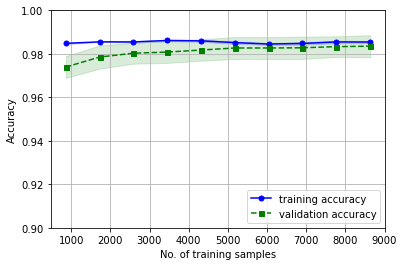

CPU times: user 5min 34s, sys: 978 ms, total: 5min 35s
Wall time: 5min 35s


In [45]:
# Diagnosing bias & variance problem with learning curves
%%time
opt_params = dict(max_depth=None, max_features='sqrt', max_samples=None,
                  min_samples_leaf=1, min_samples_split=15, n_estimators=800)

train_sizes, train_scores, test_scores = learning_curve(estimator=RandomForestClassifier(**opt_params, random_state=24), X=X_train, y=y_train,
                                                        cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
 
plt.figure()
plt.plot(train_sizes, train_mean, color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s',
          markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.ylim([0.9, 1.0])
plt.xlabel('No. of training samples'); plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
        

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [46]:
# Make predictions on validation set (for models comparison) or
# unseen test set (for generalization score of final model)
RF_preds = RF_cv.predict(X_test)

In [47]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = metrics.accuracy_score(y_test_data, preds)
    precision = metrics.precision_score(y_test_data, preds)
    recall = metrics.recall_score(y_test_data, preds)
    f1 = metrics.f1_score(y_test_data, preds)
    auc = roc_auc_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [48]:
 # Get different score metrics on test data
RF_test_scores = get_test_scores('Final RandomForest', RF_preds, y_test)
results = pd.concat([results, RF_test_scores], axis=0, ignore_index=True)
results

,model,precision,recall,F1,accuracy
0,Tuned RandomForest,0.988659,0.912714,0.948956,0.983528
1,Final RandomForest,0.983003,0.925333,0.953297,0.985827


Despite modest and unrefined data on the first round of the training, the random forest model outperforms the logistic regression model in every aspect of the scores.       

In [50]:
def conf_matrix_plot(clf_model, x_data, y_data): 
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    '''
 
    y_pred = clf_model.predict(x_data)
    cm = metrics.confusion_matrix(y_data, y_pred, labels=clf_model.classes_)  # for multinomial, use `multilabel_confusion_matrix`
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_model.classes_)
    
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation / alter str formatting
    plt.show()

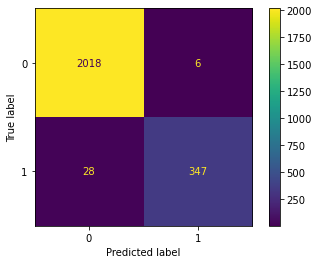

In [51]:
conf_matrix_plot(RF_cv, X_test, y_test)

- The confusion matrix indicates that, when the model makes an error, it's usually a Type II error— it gives a false negative that an employee will not leave but he actually will. 

- It might not be desirable, as company tends to suffer major loses when a valuable employee leave without prior notice. As such, the model may be adjusted to a lower probability threshold, but it comes with a trade-off of higher false positive rate.

Hence, it's important to carefully weigh the cost of false positive against the cost of false negative during the application of model.

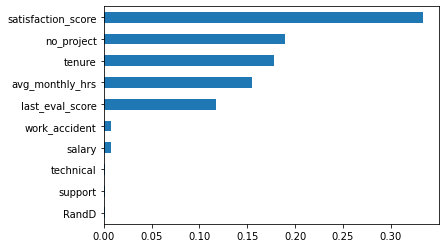

In [52]:
# Access the 10 most important features in the model:
importances = RF_cv.best_estimator_.feature_importances_ 
RF_importances = (pd.Series(importances, index=X_train.columns)
                  .sort_values(ascending=False))[:10]

fig, rf_ax = plt.subplots()
RF_importances[::-1].plot.barh(ax=rf_ax)
plt.show()

Combined with the exploratory results earlier, it renders a better understanding to how the most influential factors may interact and affect the turnover of an employee. So the management could tailor a detailed solution based on the insights.     

## Round 2

It can be skeptical for all with such unrealistic evaluation scores from a model. There's a chance that some data leakage is occuring during the development process. Data leakage may potentially be induced when data that should not be used during training is used to train the model, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed.

In this case, it's likely that the company won't have `satisfaction_level` reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage, which means that some the data may be artificially created to fit the prediction. Typically when the employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours than usual. 
 
The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

You could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`. It will be a binary variable.

### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set.

**Tree-based Machine Learning**

The decision tree model achieved precision of 91.5%, recall of 91.7%, f1-score of 91.6%, and accuracy of 97.2%, on the test set, but modestly outperformed by the random forest tree model. 

### Conclusion, Recommendations, Next Steps

The random forest model outperforms other learning models with an overall generalized accuracy of 98.6% and a balance f1 score of 95.3%. However, other factors may be considered depending on the application setting such as computational cost, latency and complexity of implementations. 

- From the discovered insights about data, the satisfaction score is affected by the number of projects and average monthly hours in a way potentially due to disproportionate distribution of work. Many employees adopt an inner satisfactory score when they work and have a strong correlation to reward system, which often involves in motivation, learning, and productivity. 

- Whereby, the employees tend to leave after their 2nd tenure when they realized they were trapped in a suboptimal work condition or offered with a better opportunity elsewhere as described by the groups.

- To retain potential talents, stakeholders ought to improve the quality of management that supports employee success and offer better growth opportunities during their 2nd tenure.   

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

For another project, a K-means model could be developed on this data and analyzing the clusters. This may yield valuable insight.